# GEO 352P Final Project - National Park Visitors and Biodiversity

### Tianyi Xu 11/4/2022

### Introduction

<img src="https://i0.wp.com/www.anseladams.com/wp-content/uploads/2021/07/50101253.jpg?w=800&ssl=1" alt="Yosemite Valley, Thunderstorm by Ansel Adams" width="490" style="float: left" />
<p>&nbsp;</p><p>&nbsp;</p><p>&nbsp;</p><p>&nbsp;</p><p>&nbsp;</p><p>&nbsp;</p><p>&nbsp;</p><p>&nbsp;</p><p>&nbsp;</p><p>&nbsp;</p><p>&nbsp;</p><p>&nbsp;</p>

The first national park, Yellowstone, was established in Montana and Wyoming as a public park for visitors in 1872. Later in 1916, President Woodrow Wilson started the National Park Service, which was responsible for protecting the 35 national parks and monuments then managed by the department. As of 2022, there are 63 national parks proteced by the National Park Service across 30 states and two US territories. With scenic drives, wildlife and flora, hiking trails, historic sites, these national parks are enjoyed by countless domestic and international visitors every year who seek for amazing adventures in natural wonders.

Alt Text: Yosemite Valley, Thunderstorm by Ansel Adams

Source: https://www.anseladams.com/thunderstorm-yosemite-valley/

### Methods

#### Packages

For this project, I am using `numpy` and `pandas` for data cleaning and analysis, and `matplotlib`, `seaborn`, `plotly`, and `cartopy` for making figures.

In [800]:
# Import packages
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from netCDF4 import Dataset as netcdf_dataset
import cartopy
import cartopy.feature as cfeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import cartopy.crs as ccrs
import warnings
warnings.filterwarnings("ignore") 
import cartopy.io.img_tiles as cimgt
import seaborn as sns
from matplotlib.colors import ListedColormap
import plotly.graph_objects as go
import plotly.io as pio
import plotly.express as px

#### Color Palette

For all the figures produced in this project, I am using a color palette inspired from Acadia National Park, one of my favorite national parks! This palette is also colorblind-friendly. For larger barplots, I am using the seaborn palete `magma`.

Source: https://github.com/kevinsblake/NatParksPalettes

<img src="https://raw.githubusercontent.com/kevinsblake/NatParksPalettes/main/photos/Acadia.png" alt="Yosemite Valley, Thunderstorm by Ansel Adams" width="490" style="float: left" />

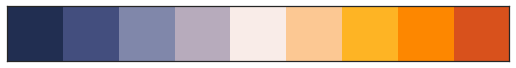

In [801]:
# Create a palette using hex values
acadia = ['#212e51','#434e7e', '#8087aa', '#b7abbc', '#f9ece8', '#fcc893', '#feb424', '#fd8700', '#d8511c']
acadia7 = ['#212e51','#434e7e', '#8087aa', '#b7abbc', '#f9ece8', '#fcc893', '#feb424']
sns.palplot(sns.color_palette(acadia))

#### Data

Datasets used in this project are publicly available on Kaggle and Data World.

Sources: 
* https://www.kaggle.com/datasets/aliamini587/biodiversity-in-national-parks
* https://data.world/inform8n/us-national-parks-visitation-1904-2016-with-boundaries

In [802]:
# Import datasets
parks = pd.read_csv('parks.csv')
species = pd.read_csv('species.csv')
visit = pd.read_csv('allvisit.csv')

# Extract only information of interest and cleaning data
visit = visit[visit['Unit Type'] == "National Park"]
visit = visit.rename(columns = {'Unit Name': 'Park'})
visit = visit[['Region', 'State', 'Unit Code', 'Park', 'Visitors', 'YearRaw']]
visit.drop(visit.loc[visit['Park'] == "Denali National Preserve"].index, inplace = True)

`Parks` is a dataset with park names, sizes, and geographic locations.

In [803]:
parks = parks.rename(columns = {'Park Name': 'Park'})
parks.head(3)

,Park Code,Park,State,Acres,Latitude,Longitude
0,ACAD,Acadia National Park,ME,47390,44.35,-68.21
1,ARCH,Arches National Park,UT,76519,38.68,-109.57
2,BADL,Badlands National Park,SD,242756,43.75,-102.50


In [804]:
# Change acres column to float type
parks['Acres'] = parks['Acres'].astype(float)/1000

In [805]:
size = parks['Acres']
size.dtype

dtype('float64')

`Species` is a dataset with park names and information of all species observations recorded in the parks.

In [806]:
species = species.rename(columns = {'Park Name': 'Park'})
species.head(3)

,Species ID,Park,Category,Order,Family,Scientific Name,Common Names,Record Status,Occurrence,Nativeness,Abundance,Seasonality,Conservation Status
0,ACAD-1000,Acadia National Park,Mammal,Artiodactyla,Cervidae,Alces alces,Moose,Approved,Present,Native,Rare,Resident,NaN
1,ACAD-1001,Acadia National Park,Mammal,Artiodactyla,Cervidae,Odocoileus virginianus,"Northern White-Tailed Deer, Virginia Deer, Whi...",Approved,Present,Native,Abundant,NaN,NaN
2,ACAD-1002,Acadia National Park,Mammal,Carnivora,Canidae,Canis latrans,"Coyote, Eastern Coyote",Approved,Present,Not Native,Common,NaN,Species of Concern


`Visit` is a dataset with park names and annual visitor counts from 1904 to 2016.

In [807]:
visit.head(3)

,Region,State,Unit Code,Park,Visitors,YearRaw
0,PW,OR,CRLA,Crater Lake National Park,1500.0,1904
3,PW,WA,OLYM,Olympic National Park,2200.0,1935
5,NE,ME,ACAD,Acadia National Park,64000.0,1919


### Data Analysis and Visualization

#### Display National Park Distribution Using `Cartopy`

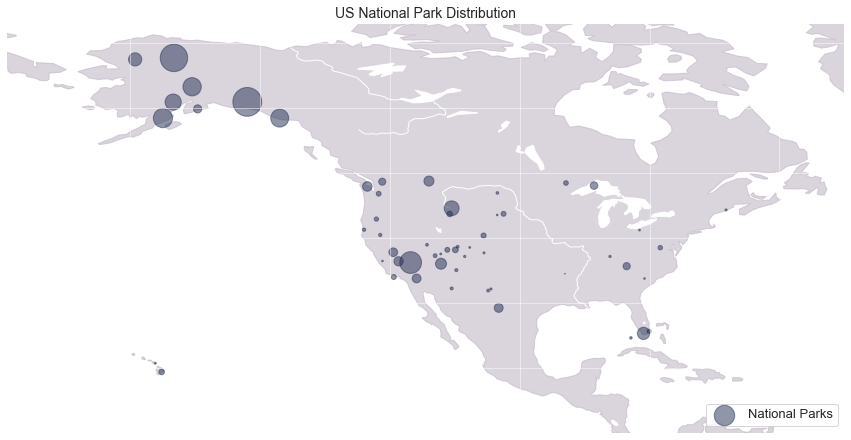

In [808]:
# Set up the figure and use platecarree projection
plt.figure(figsize = (15, 15))
ax = plt.axes(projection = ccrs.PlateCarree())

# Create and set extent for the map
extent = [-179, -50, 10, 55]
ax.set_extent(extent)

# Add features to the map
# ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.LAND, color = '#b7abbc', alpha = 0.5)
ax.add_feature(cartopy.feature.LAKES, color = 'white')
ax.add_feature(cartopy.feature.RIVERS, color = 'white')
ax.axis('off')

# Add gridlines
ax.gridlines(color = 'white', alpha = 0.5)

# You can also add stamen terrain background to the map
# stamen_terrain = cimgt.Stamen('terrain-background')
# ax.add_image(stamen_terrain, 4)

# Plot national park locations
plt.scatter(parks['Longitude'], parks['Latitude'], color = '#212e51', alpha = 0.5, s = size/10,
         transform = ccrs.PlateCarree(), label = 'National Parks')
plt.legend(loc = 'lower right', fontsize = 13)
plt.title("US National Park Distribution", fontsize = 14);

#### Time-series Analysis with National Park Visitors from 1904-2016 and Total Visitors

In [811]:
# Unique states
unistate = visit["State"].unique()
print(unistate)

['OR' 'WA' 'ME' 'TX' 'FL' 'NC' 'MI' 'CA' 'VA' 'CO' 'UT' 'NM' 'WY' 'HI'
 'KY' 'NV' 'ND' 'VI' 'AZ' 'SD' 'OH' 'SC' 'AR' 'AK' 'AS' 'MT' 'MN']


In [812]:
# Unique years
print(visit["YearRaw"].unique())
print(visit["YearRaw"].unique().shape)

['1904' '1935' '1919' '1944' '1948' '1931' '1940' '1971' '1936' '1934'
 '1929' '1937' '1924' '1921' '1906' '1908' '1963' '1965' '1972' '1960'
 '1938' '1941' '1923' '1957' '1915' '1933' '1917' '1939' '1978' '1985'
 '1920' '1922' '1982' '1956' '1970' '1932' '2002' '1911' '1976' 'Total'
 '2016' '2015' '2014' '2013' '2012' '2011' '2010' '2009' '2008' '2007'
 '2006' '2005' '2003' '2004' '2001' '2000' '1999' '1998' '1997' '1996'
 '1995' '1994' '1993' '1992' '1991' '1990' '1989' '1988' '1987' '1986'
 '1984' '1983' '1981' '1980' '1979' '1977' '1975' '1974' '1973' '1969'
 '1968' '1967' '1966' '1964' '1962' '1961' '1959' '1958' '1955' '1954'
 '1953' '1952' '1951' '1950' '1949' '1947' '1946' '1945' '1943' '1942'
 '1930' '1928' '1927' '1926' '1925' '1918' '1916' '1914' '1913' '1912'
 '1910' '1909' '1905' '1907']
(114,)


Notice that there is a value of total visitors of all years, which would make the analysis harder. Here, I made a new dataset just for total visitors of all national parks, and deleted rows with total visitors on the original dataset.

In [813]:
# Create a new dataset only with total visitors
totalvisit = visit[visit['YearRaw'] == 'Total']

# Sorting the dataset by visitor numbers
totalvisit.sort_values(by = ['Visitors'], ascending = False).head()

,Region,State,Unit Code,Park,Visitors,YearRaw
412,SE,NC,GRSM,Great Smoky Mountains National Park,521947058.0,Total
652,IM,AZ,GRCA,Grand Canyon National Park,205486894.0,Total
708,PW,CA,YOSE,Yosemite National Park,190404561.0,Total
644,IM,CO,ROMO,Rocky Mountain National Park,180076609.0,Total
496,IM,WY,YELL,Yellowstone National Park,175040126.0,Total


In [814]:
totalvisit.sort_values(by = ['Visitors']).head()

,Region,State,Unit Code,Park,Visitors,YearRaw
760,PW,AS,NPSA,National Park of American Samoa,113694.0,Total
743,AK,AK,KOVA,Kobuk Valley National Park,156655.0,Total
735,AK,AK,GAAR,Gates of the Arctic National Park,225813.0,Total
744,AK,AK,LACL,Lake Clark National Park,363894.0,Total
414,MW,MI,ISRO,Isle Royale National Park,1071614.0,Total


Looks like the most visited national parks are Great Smoky, Grand Canyon, Yosemite, Rocky Mountain, and Yellowstone. Not surprising at all! I've been to 4/5. Maybe it's time for us to visit some less well-known national parks, such as parks in the Pacific Ocean and Alaska.

Below, I am plotting visitor counts in states with the most national parks: California, Alaska, and Utah.

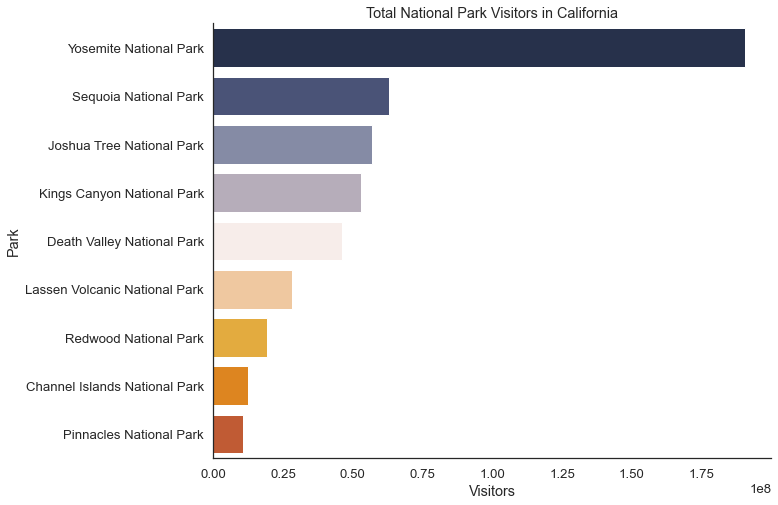

In [579]:
sns.set(font_scale = 1.2)
sns.set_style("white")

# National parks in California
ca = totalvisit[totalvisit['State'] == 'CA']
sns.barplot(ca["Visitors"], ca["Park"],
            palette = acadia, order = ca.sort_values('Visitors', ascending = False).Park).set(title = 'Total National Park Visitors in California')
sns.despine();

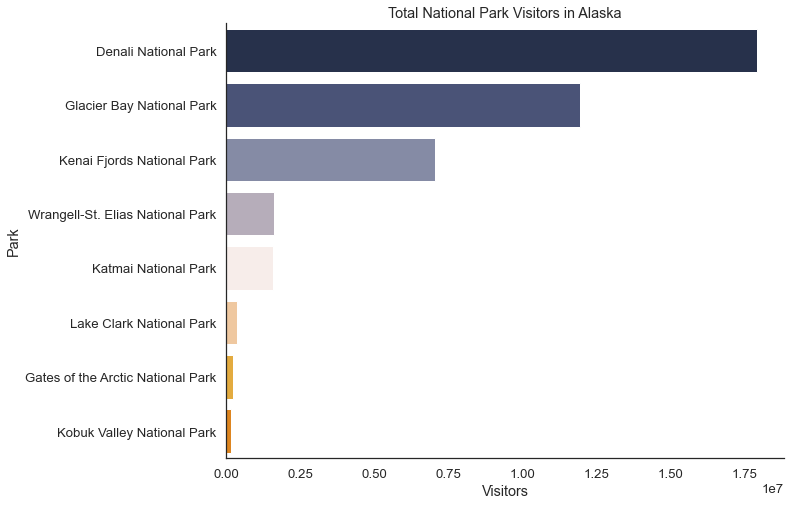

In [550]:
# National parks in Alaska
ak = totalvisit[totalvisit['State'] == 'AK']

# Barplot
sns.set(font_scale = 1.2)
sns.set_style("white")
sns.barplot(ak["Visitors"], ak["Park"],
            palette = acadia, order = ak.sort_values('Visitors', ascending = False).Park).set(title = 'Total National Park Visitors in Alaska')
sns.despine();

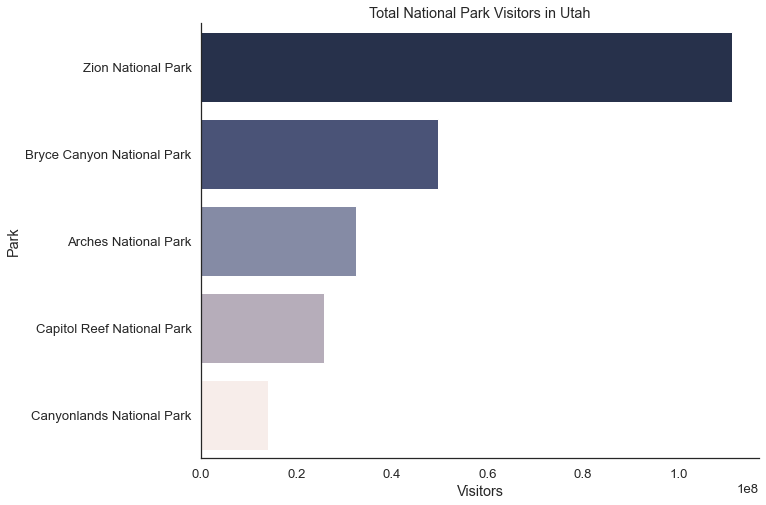

In [580]:
# National parks in Utah
ut = totalvisit[totalvisit['State'] == 'UT']

# Barplot
sns.set(font_scale = 1.2)
sns.set_style("white")
sns.barplot(ut["Visitors"], ut["Park"],
            palette = acadia, order = ut.sort_values('Visitors', ascending = False).Park).set(title = 'Total National Park Visitors in Utah')
sns.despine();

Which states have the most national park visitors? The answer is North Carolina, with the Great Smokies!

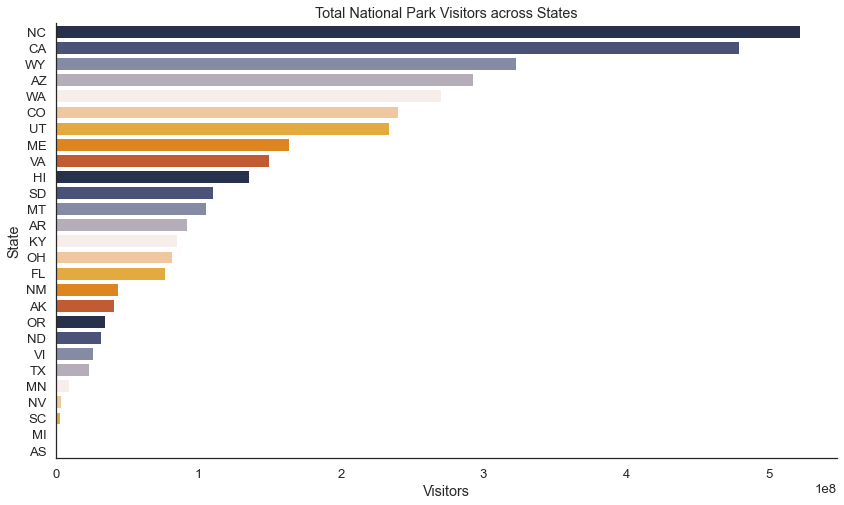

In [815]:
# Group national park visitors by state and sort the value
state = pd.DataFrame(totalvisit.groupby('State')['Visitors'].sum(), columns = ['Visitors'])
state = state.reset_index()
state.sort_values(by = ['Visitors'], ascending = False, inplace = True)

# Barplot
sns.set(font_scale = 1.2)
sns.set_style("white")
sns.barplot(state["Visitors"], state["State"],
            palette = acadia, order = state.sort_values('Visitors', ascending = False).State).set(title = 'Total National Park Visitors across States')
sns.despine();

In [816]:
# Drop total visitor rows from the visitor dataset
visit.drop(visit.loc[visit['YearRaw'] == "Total"].index, inplace = True)
visit.sort_values(by = ['YearRaw'], inplace = True)
print(visit.shape)
visit.head()

(4587, 6)


,Region,State,Unit Code,Park,Visitors,YearRaw
0,PW,OR,CRLA,Crater Lake National Park,1500.0,1904
345,MW,AR,HOSP,Hot Springs National Park,101000.0,1904
339,MW,SD,WICA,Wind Cave National Park,2900.0,1904
315,PW,WA,MORA,Mount Rainier National Park,563.0,1904
206,PW,CA,KICA,Kings Canyon National Park,1000.0,1904


After some further data cleaning, we are ready for plotting a time-series graph of national park visitors through time.

# 这里！！！！！！x轴咋回事！！！！

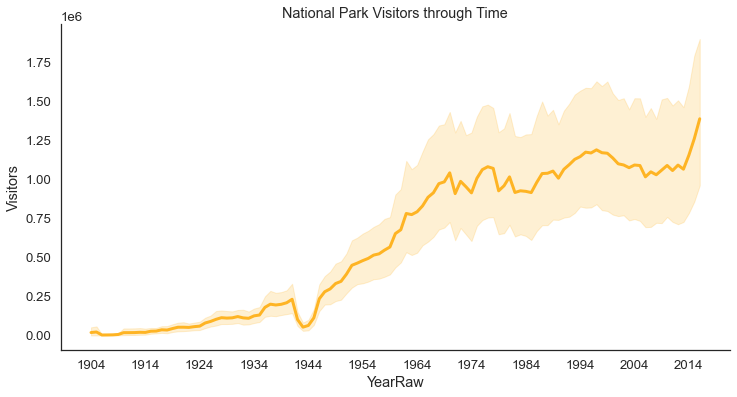

In [827]:
# Visitors through time of all national parks
plt.figure(figsize = (12, 6))
sns.set_style('white')
sns.lineplot(data = visit, x = 'YearRaw', y = 'Visitors', lw = 3, color = '#feb424').set(title = 'National Park Visitors through Time')
plt.xticks(np.arange(0, len(set(visit['YearRaw'])) + 1, 10))

sns.despine();

What about the increasing trend of national park visitors for individual state? Here, I used `plotly` to create an interactive plot.

In [818]:
# Group visitors by states and years for visualization
stateyear = pd.DataFrame(visit.groupby(['YearRaw', 'State'])['Visitors'].sum(), columns = ['Visitors'])
stateyear = stateyear.reset_index()
stateyear.head()

,YearRaw,State,Visitors
0,1904,AR,101000.0
1,1904,CA,1000.0
2,1904,OR,1500.0
3,1904,SD,2900.0
4,1904,WA,563.0


In [819]:
# Extract the magma palette from sns
pal = list(sns.color_palette(palette = 'magma', n_colors = 27).as_hex())

# Set up the template
pio.templates.default = "simple_white"
fig = go.Figure()

# Plotly graph
for state, color in zip(unistate, pal):
    fig.add_trace(go.Scatter(x = stateyear[stateyear['State'] == state]['YearRaw'],
                             y = stateyear[stateyear['State'] == state]['Visitors'],
                             name = state,
                             line_color = color, 
                             fill = None)) 
# Add layout
fig.update_layout(title = dict(text = "National Park Visitors through Time Across States"), 
                  xaxis = dict(title = "Year"), 
                  yaxis = dict(title = "Visitors"))

# Add two buttons: select and deselect all
fig.update_layout(dict(updatemenus = [dict(type = "buttons", direction = "left",
                                         buttons = list([dict(args = ["visible", "legendonly"], label = "Deselect All", method = "restyle"),
                                                       dict(args = ["visible", True], label = "Select All", method = "restyle")]),
                                         pad = {"r": 10, "t": 10},
                                         showactive = False, x = 1, xanchor = "right",
                                         y = 1.1, yanchor = "top")]))
fig.show()

Most of the national parks have an increasing number of visitors through time, but a minority of them have a relatively stable number.

#### National Park Biodiversity Analysis

What species are found in national parks across the US?

In [386]:
# Unique species category
print(species["Category"].unique())

['Mammal' 'Bird' 'Reptile' 'Amphibian' 'Fish' 'Vascular Plant'
 'Spider/Scorpion' 'Insect' 'Invertebrate' 'Fungi' 'Nonvascular Plant'
 'Crab/Lobster/Shrimp' 'Slug/Snail' 'Algae']


In [387]:
# Numbers of species for each category
species['Category'].value_counts()

Vascular Plant         65221
Bird                   14601
Insect                 14349
Fungi                   6203
Nonvascular Plant       4278
Fish                    3956
Mammal                  3867
Invertebrate            1566
Reptile                 1343
Algae                    976
Slug/Snail               787
Spider/Scorpion          776
Amphibian                743
Crab/Lobster/Shrimp      582
Name: Category, dtype: int64

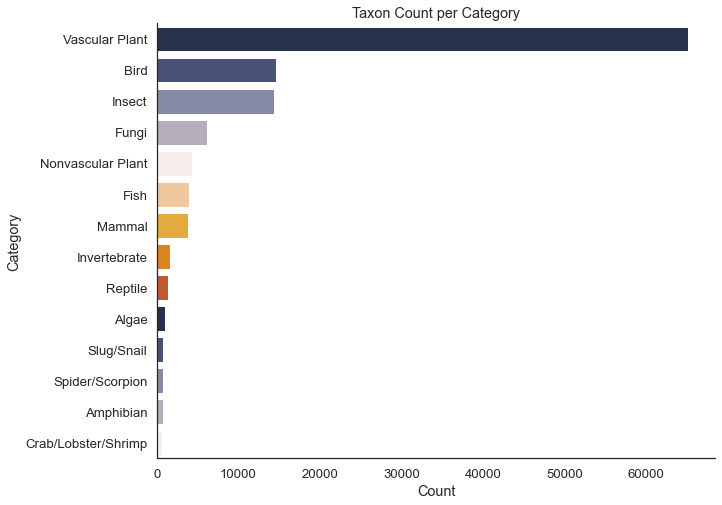

In [388]:
# Create a dataset with category counts
category = pd.DataFrame(species.groupby("Category").size(), columns = ["Count"])
category = category.reset_index()

# Plot taxon count for each category
sns.set(font_scale = 1.2)
sns.set_style("white")
sns.barplot(category["Count"], category["Category"], 
            order = category.sort_values('Count', ascending = False).Category,
           palette = acadia).set(title = 'Taxon Count per Category')
sns.despine();

The majority of species found in national parks are vascular plant, which is not surprised at all! However, I am a vertebrate biologist.

In [470]:
# Select only vertebrates from the biodiversity data
vert = species[species['Category'].isin(['Bird','Fish', 'Mammal', 'Reptile', 'Amphibian'])]
# Species count in each category
vert_category = pd.DataFrame(vert.groupby("Category").size(), columns = ["Count"])
vert_category = vert_category.reset_index()
vert_category

,Category,Count
0,Amphibian,743
1,Bird,14601
2,Fish,3956
3,Mammal,3867
4,Reptile,1343


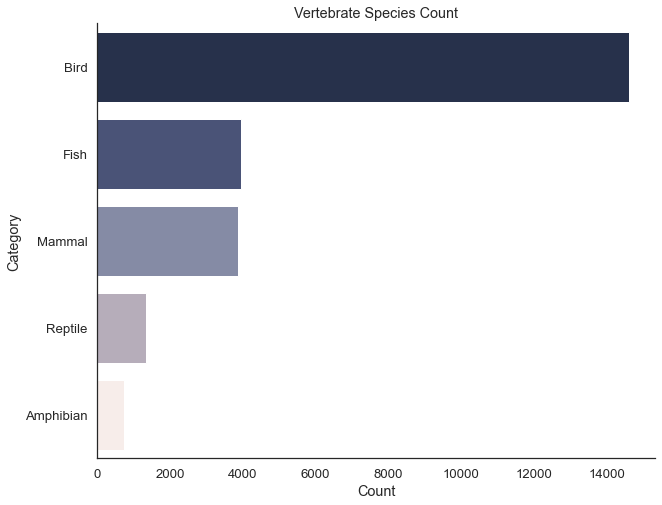

In [392]:
sns.set(font_scale = 1.2)
sns.set_style("white")
sns.barplot(vert_category["Count"], vert_category["Category"],
           palette = acadia, 
           order = vert_category.sort_values('Count', ascending = False).Category).set(title = 'Vertebrate Species Count')
sns.despine();

There are a lot of birds, but not many herps. Let's only consider terrestrial vertebrates (non-fish vertebrates).

In [471]:
# Select non-fish vertebrates
nfvert = species[species['Category'].isin(['Bird', 'Mammal', 'Reptile', 'Amphibian'])]
nfvert_category = pd.DataFrame(nfvert.groupby("Category").size(), columns = ["Count"])
nfvert_category = nfvert_category.reset_index()
nfvert_category

,Category,Count
0,Amphibian,743
1,Bird,14601
2,Mammal,3867
3,Reptile,1343


In [823]:
# Group and sort dataset by vertebrate biodiversity
nfvertdiversity = nfvert.groupby("Park")["Scientific Name"].count().reset_index(name = 'Count')
nfvertdiversity.sort_values(by = ['Count'], ascending = False).head()

,Park,Count
14,Death Valley National Park,904
44,Redwood National Park,727
21,Grand Canyon National Park,653
3,Big Bend National Park,579
9,Carlsbad Caverns National Park,536


The top 5 national parks with highest non-fish vertebrate biodiversity are Death Valley, Redwood, Grand Canyon, Big Bend, and Carlsbad Caverns. 

In [514]:
# Add biodiversity data to the parks dataset for location information
parkdiversity = pd.merge(parks, nfvertdiversity)
parkdiversity.head(3)

,Park Code,Park,State,Acres,Latitude,Longitude,Count
0,ACAD,Acadia National Park,ME,47.390,44.35,-68.21,445
1,ARCH,Arches National Park,UT,76.519,38.68,-109.57,292
2,BADL,Badlands National Park,SD,242.756,43.75,-102.50,326


With a merged dataset, we are able to plot vertebrate biodiversity data on the US map.

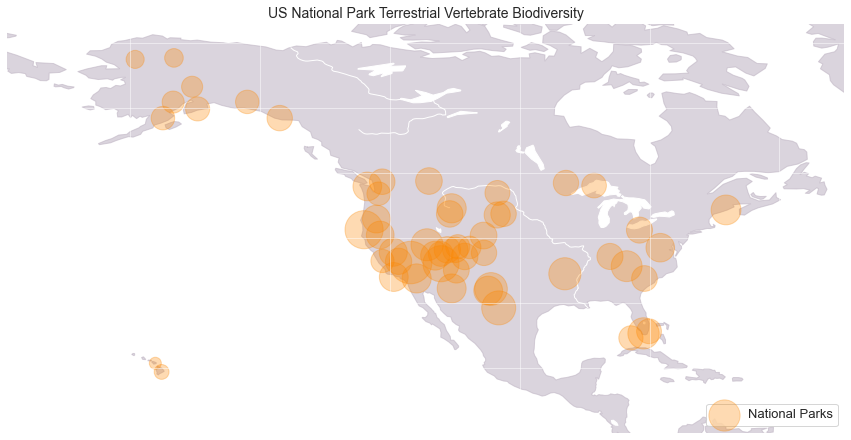

In [797]:
plt.figure(figsize = (15, 15))
ax = plt.axes(projection = ccrs.PlateCarree())

# Create and set extent for the map
extent = [-179, -50, 10, 55]
ax.set_extent(extent)

# Add features to the map
# ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.LAND, color = '#b7abbc', alpha = 0.5)
ax.add_feature(cartopy.feature.LAKES, color = 'white')
ax.add_feature(cartopy.feature.RIVERS, color = 'white')
ax.axis('off')

# Add gridlines
ax.gridlines(color = 'white', alpha = 0.5)

# Plot national park locations
plt.scatter(parks['Longitude'], parks['Latitude'], color = "#fd8700", alpha = 0.3, s = parkdiversity["Count"]*2,
         transform = ccrs.PlateCarree(), label = 'National Parks')
plt.legend(loc = 'lower right', fontsize = 13)
plt.title("US National Park Terrestrial Vertebrate Biodiversity", fontsize = 14);

What are the national parks with the most terrestrial vertebrate species of conservation concern?

In [770]:
# Count of conservation category in each park
conserve = nfvert[['Park', 'Conservation Status']].groupby(['Park', 'Conservation Status']).size()

# Convert to dataframe
conserve_df = conserve.to_frame().reset_index()
conserve_df.columns = ['Park', 'Conservation Status', 'Count']

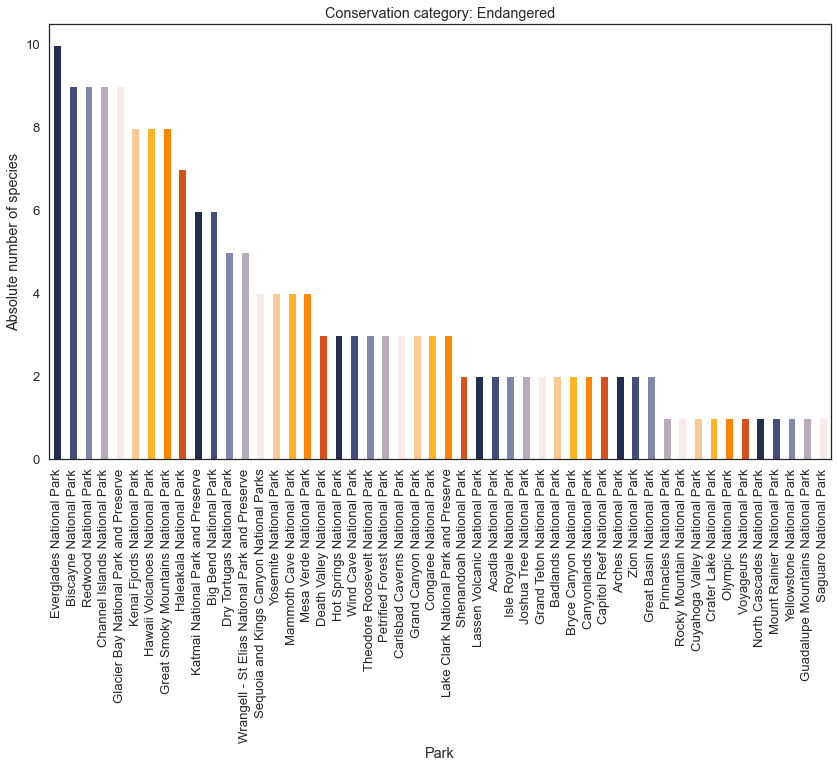

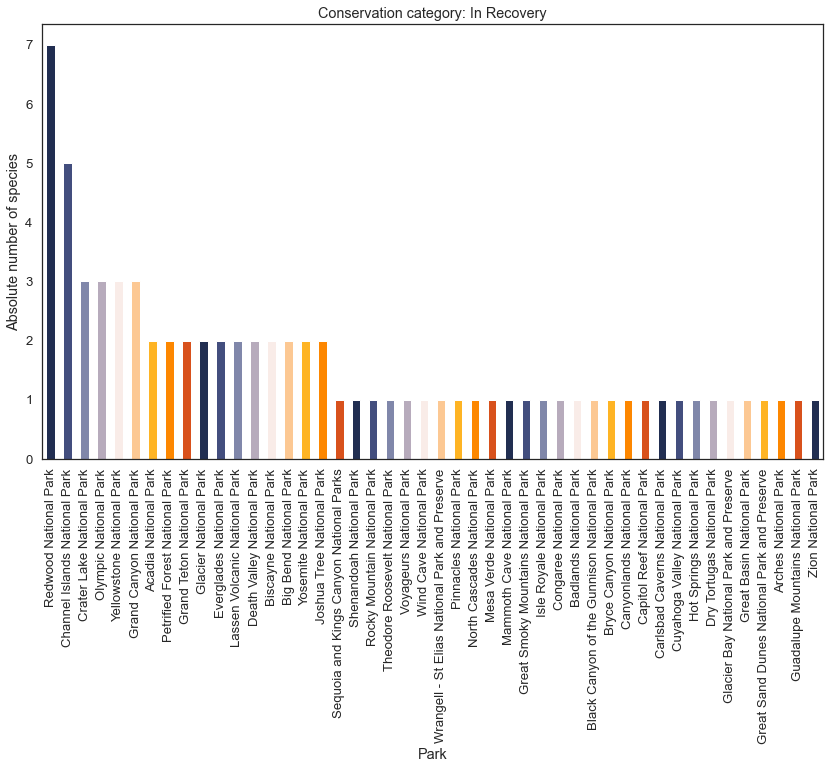

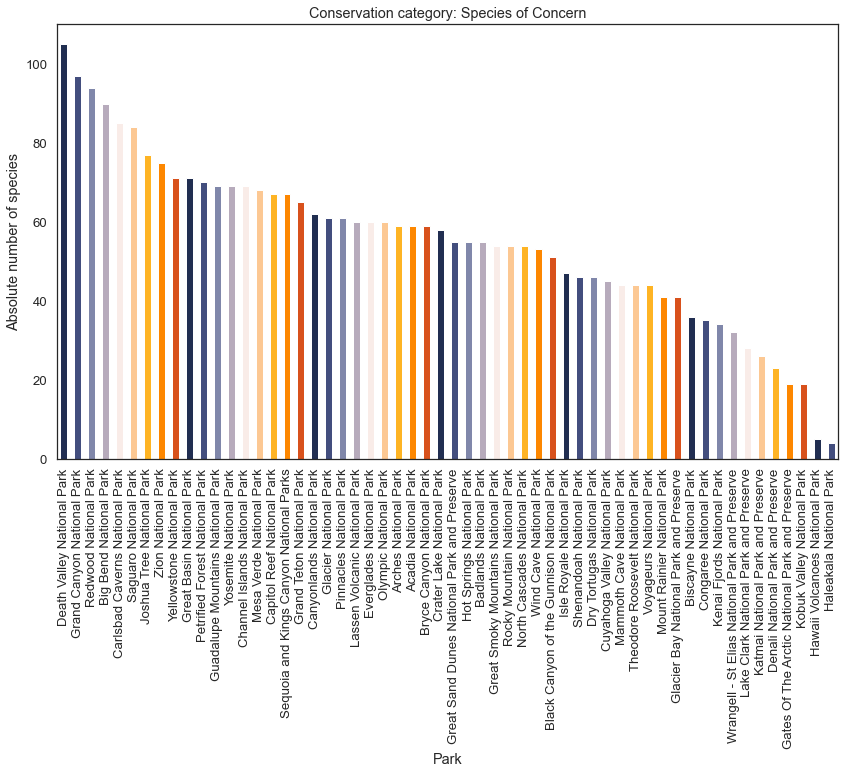

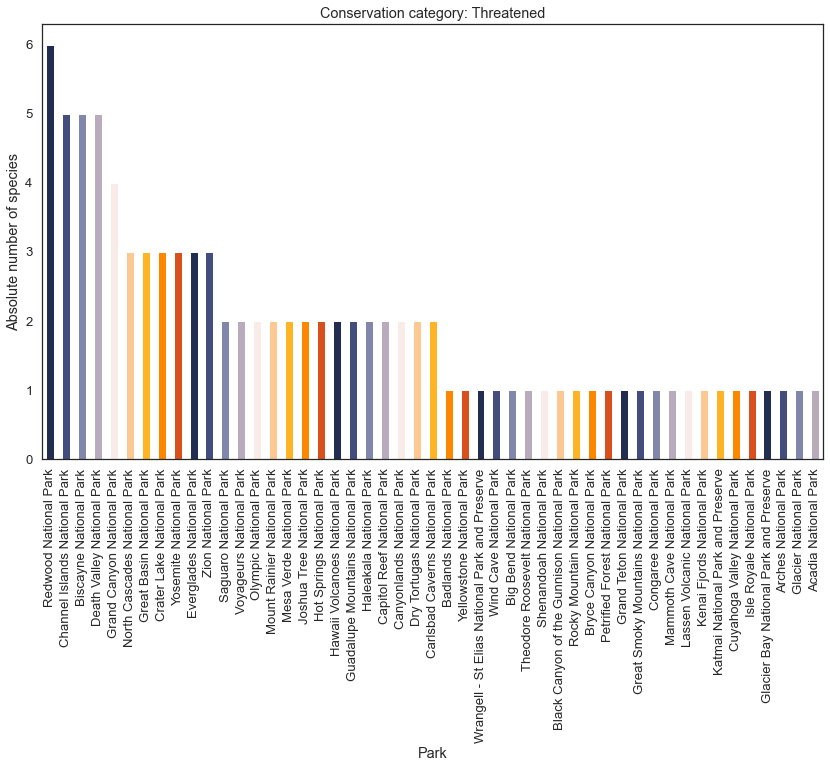

In [788]:
iucn = ['Endangered', 'In Recovery', 'Species of Concern', 'Threatened']
    
# Use a for loop to create barplots for each conservation category
for i in iucn:
    subset = conserve_df[conserve_df['Conservation Status'] == i]
    subset.sort_values(by = 'Count', ascending = False).plot(x = 'Park', y = 'Count', kind = 'bar', legend = None, color = acadia)
    plt.ylabel('Absolute number of species')
    plt.title('Conservation category: %s' % (i))
plt.show();

Let's take a closer look at reptile species! (I study them :D)

In [693]:
# Select only reptile, and use groupby to see reptile diversity in each park
reptile = vert[species['Category'] == 'Reptile']
reptilediversity = reptile.groupby("Park")["Scientific Name"].count().reset_index(name = 'Count')
reptilediversity.sort_values(by = ['Count'], ascending = False).head()

,Park,Count
14,Death Valley National Park,90
19,Grand Canyon National Park,76
3,Big Bend National Park,62
9,Carlsbad Caverns National Park,62
40,Saguaro National Park,62


The parks with the most reptile species are Death Valley, Grand Canyon, Big Bend, Carlsbad Caverns, and Saguaro. Very interesting! I have been to 3/5, and will visit Big Bend and Carlsbad Caverns this Thanksgiving.

In [707]:
# The most common reptiles found in the park
famreptile = reptile.groupby("Family")["Scientific Name"].count().reset_index(name = 'Count')
famreptile.sort_values(by = ['Count'], ascending = False).head()

,Family,Count
7,Colubridae,559
15,Iguanidae,246
25,Viperidae,99
11,Emydidae,90
19,Scincidae,67


Which national parks have invasive reptile species?

In [723]:
# Select the non-native reptile species
invasive = reptile[reptile["Nativeness"] == "Not Native"]
invasivecount = invasive.groupby("Park")["Scientific Name"].count().reset_index(name = 'Count')
invasivecount.sort_values(by = ['Count'], ascending = False, inplace = True)

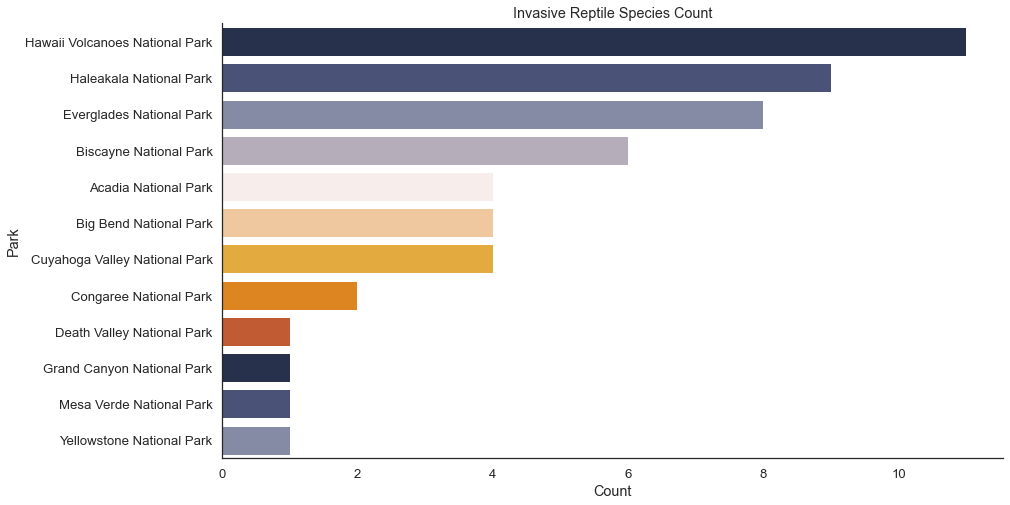

In [769]:
sns.set(font_scale = 1.2)
sns.set_style("white")

# Barplot of invasive species of reptiles in each park
sns.barplot(invasivecount["Count"], invasivecount["Park"],
           palette = acadia).set(title = 'Invasive Reptile Species Count')
sns.despine();

According to this barplot, national parks in Hawaii and Florida have the most invasive reptile species.

#### Explore Correlations between Variables

In this section, I hope to answer three questions with existing data.

Are there correlations between:
* Terrestrial vertebrate species diversity and national park size?
* Visitor counts and national park size?
* Terrestrial vertebrate species diversity and visitor counts?

In [436]:
# Merge the biodiversity and total visit datasets
merge = pd.merge(parkdiversity, totalvisit, on = ['Park'])
merge.head()

,Park Code,Park,State_x,Acres,Latitude,Longitude,Count,Region,State_y,Unit Code,Visitors,YearRaw
0,ACAD,Acadia National Park,ME,47.390,44.35,-68.21,445,NE,ME,ACAD,163512192.0,Total
1,ARCH,Arches National Park,UT,76.519,38.68,-109.57,292,IM,UT,ARCH,32577956.0,Total
2,BADL,Badlands National Park,SD,242.756,43.75,-102.50,326,MW,SD,BADL,69483454.0,Total
3,BIBE,Big Bend National Park,TX,801.163,29.25,-103.25,579,IM,TX,BIBE,15820237.0,Total
4,BISC,Biscayne National Park,FL,172.924,25.65,-80.08,309,SE,FL,BISC,18615078.0,Total


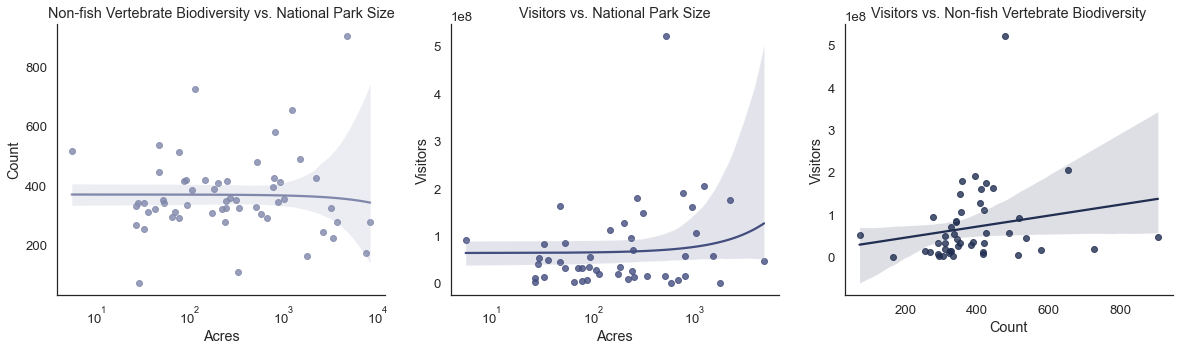

In [824]:
# Set a template for subplots
fig, axes = plt.subplots(1, 3, figsize = (20, 5))
sns.set(font_scale = 1.2)
sns.set_style("white")

# First plot: Biodiversity vs. Park Size
g = sns.regplot(ax = axes[0], x = "Acres", y = "Count", data = parkdiversity, color = "#8087aa")
g.set_title('Non-fish Vertebrate Biodiversity vs. National Park Size')
g.set(xscale = "log")

# Second plot: Visitors vs. Park Size
h = sns.regplot(ax = axes[1], x = "Acres", y = "Visitors", data = merge, color = "#434e7e")
h.set_title('Visitors vs. National Park Size')
h.set(xscale = "log")

# Third plot: Visitors vs. Biodiversity
j = sns.regplot(ax = axes[2], x = "Count", y = "Visitors", data = merge, color = "#212e51")
j.set_title('Visitors vs. Non-fish Vertebrate Biodiversity')

sns.despine();

According to the linear regression plots, there is no significant correlation between national park size and either biodiversity or visitor counts. This is probably because national park size varies to a great extent, and there are other factors playing a more important role in determining visitor counts and biodiversity. The number of visitors may be greatly impacted by parks' locations and reputation. Park biodiversity, on the other hand, may be related to climate and ecosystem in which the park is located. 

What is interesting is the positive correlation between visitor counts and terrestrial vertebrate biodiversity. As the park biodiversity increases, the park tends to be more visitors. This is expected because many visitors go to national parks for their abundance of unique wildlife and ecosystems, like myself!

### Future Directions

* Effect of COVID-19 on visitor numbers of national parks
* Addition of finer geographic data for national park shapes